In [1]:
# Importación de librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Carga de datos
try:
    datos_entrenamiento = pd.read_excel('Datos_proyecto.xlsx')
    datos_prueba = pd.read_excel('Datos de prueba_proyecto.xlsx')
    print("Datos cargados exitosamente")
except Exception as e:
    print(f"Error al cargar datos: {e}")

# Información básica de los datasets
print("=== INFORMACIÓN DATASET ENTRENAMIENTO ===")
print(f"Forma del dataset: {datos_entrenamiento.shape}")
print(f"Columnas: {list(datos_entrenamiento.columns)}")
print("\nPrimeras 5 filas:")
print(datos_entrenamiento.head())

print("\n=== INFORMACIÓN DATASET PRUEBA ===")
print(f"Forma del dataset: {datos_prueba.shape}")
print(f"Columnas: {list(datos_prueba.columns)}")
print("\nPrimeras 5 filas:")
print(datos_prueba.head())

Datos cargados exitosamente
=== INFORMACIÓN DATASET ENTRENAMIENTO ===
Forma del dataset: (2424, 2)
Columnas: ['textos', 'labels']

Primeras 5 filas:
                                              textos  labels
0  "Aprendizaje" y "educación" se consideran sinó...       4
1  Para los niños más pequeños (bebés y niños peq...       4
2  Además, la formación de especialistas en medic...       3
3  En los países de la OCDE se tiende a pasar de ...       4
4  Este grupo se centró en las personas que padec...       3

=== INFORMACIÓN DATASET PRUEBA ===
Forma del dataset: (152, 1)
Columnas: ['Textos_espanol']

Primeras 5 filas:
                                      Textos_espanol
0  El rector, que es el representante local del M...
1  Tenga en cuenta que todos los programas antipo...
2  Debido a que son en gran medida invisibles, es...
3  Los recursos aún son limitados en este sector....
4  Durante el período 1985-2008, la educación pri...


In [3]:
# Información detallada del dataset de entrenamiento
print("=== INFORMACIÓN DETALLADA ENTRENAMIENTO ===")
print(datos_entrenamiento.info())
print("\nTipos de datos:")
print(datos_entrenamiento.dtypes)

print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(datos_entrenamiento.describe(include='all'))

# Verificar valores únicos en columnas categóricas
print("\n=== VALORES ÚNICOS POR COLUMNA ===")
for columna in datos_entrenamiento.columns:
    valores_unicos = datos_entrenamiento[columna].nunique()
    print(f"{columna}: {valores_unicos} valores únicos")

=== INFORMACIÓN DETALLADA ENTRENAMIENTO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   textos  2424 non-null   object
 1   labels  2424 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.0+ KB
None

Tipos de datos:
textos    object
labels     int64
dtype: object

=== ESTADÍSTICAS DESCRIPTIVAS ===
                                                   textos       labels
count                                                2424  2424.000000
unique                                               2424          NaN
top     "Aprendizaje" y "educación" se consideran sinó...          NaN
freq                                                    1          NaN
mean                                                  NaN     3.006188
std                                                   NaN     1.121012
min                                                  

In [4]:
# Análisis de valores nulos
print("=== ANÁLISIS DE VALORES FALTANTES ===")
valores_nulos = datos_entrenamiento.isnull().sum()
porcentaje_nulos = (valores_nulos / len(datos_entrenamiento)) * 100

resumen_nulos = pd.DataFrame({
    'columna': valores_nulos.index,
    'valores_nulos': valores_nulos.values,
    'porcentaje': porcentaje_nulos.values
})
resumen_nulos = resumen_nulos[resumen_nulos['valores_nulos'] > 0].sort_values('valores_nulos', ascending=False)

print(resumen_nulos)

# Visualización de valores faltantes
if len(resumen_nulos) > 0:
    plt.figure(figsize=(10, 6))
    plt.bar(resumen_nulos['columna'], resumen_nulos['porcentaje'])
    plt.title('Porcentaje de Valores Faltantes por Columna')
    plt.xlabel('Columnas')
    plt.ylabel('Porcentaje (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No hay valores faltantes en el dataset")

=== ANÁLISIS DE VALORES FALTANTES ===
Empty DataFrame
Columns: [columna, valores_nulos, porcentaje]
Index: []
No hay valores faltantes en el dataset


=== ANÁLISIS VARIABLE OBJETIVO: labels ===
Distribución de clases:
labels
1     505
3     894
4    1025
Name: count, dtype: int64

Porcentajes:
ODS 1: 20.83%
ODS 3: 36.88%
ODS 4: 42.29%

=== MAPEO DE CLASES ===
Label 1: ODS 1 - Fin de la pobreza - 505 textos
Label 3: ODS 3 - Salud y bienestar - 894 textos
Label 4: ODS 4 - Educación de calidad - 1025 textos


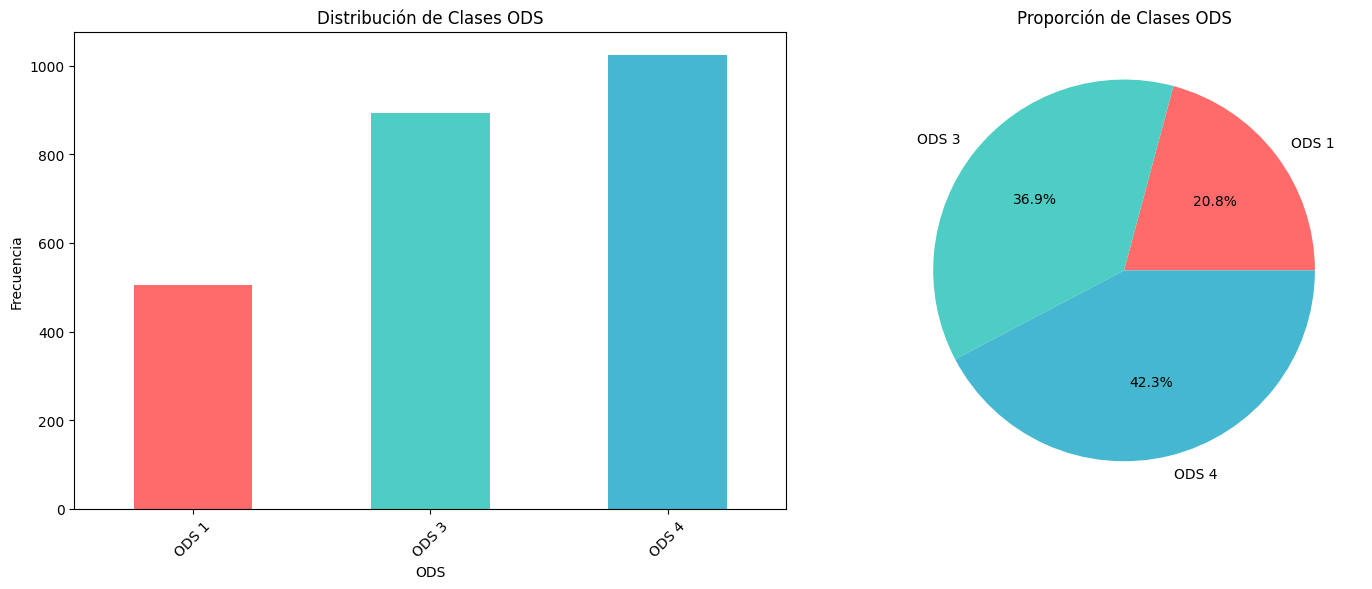


=== ANÁLISIS DE DESBALANCE ===
Clase mayoritaria: 1025 instancias
Clase minoritaria: 505 instancias
Ratio de desbalance: 2.03:1
Dataset desbalanceado detectado - Considerar técnicas de balanceo

=== ESTADÍSTICAS POR CLASE ===
ODS 1 - Fin de la pobreza: 505 textos (20.8%)
ODS 3 - Salud y bienestar: 894 textos (36.9%)
ODS 4 - Educación de calidad: 1025 textos (42.3%)


In [7]:
# Análisis de la distribución de clases
print("=== ANÁLISIS VARIABLE OBJETIVO: labels ===")

# Distribución de clases
distribucion_clases = datos_entrenamiento['labels'].value_counts().sort_index()
print("Distribución de clases:")
print(distribucion_clases)

# Porcentajes
porcentajes = datos_entrenamiento['labels'].value_counts(normalize=True).sort_index() * 100
print("\nPorcentajes:")
for label, porcentaje in porcentajes.items():
    print(f"ODS {label}: {porcentaje:.2f}%")

# Mapeo de labels a ODS
mapeo_ods = {
    1: "ODS 1 - Fin de la pobreza",
    3: "ODS 3 - Salud y bienestar", 
    4: "ODS 4 - Educación de calidad"
}

print("\n=== MAPEO DE CLASES ===")
for label, descripcion in mapeo_ods.items():
    if label in distribucion_clases.index:
        print(f"Label {label}: {descripcion} - {distribucion_clases[label]} textos")

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
labels_nombres = [f"ODS {label}" for label in distribucion_clases.index]
colores = ['#FF6B6B', '#4ECDC4', '#45B7D1']
distribucion_clases.plot(kind='bar', ax=ax1, color=colores)
ax1.set_title('Distribución de Clases ODS')
ax1.set_xlabel('ODS')
ax1.set_ylabel('Frecuencia')
ax1.set_xticklabels(labels_nombres, rotation=45)

# Gráfico de pastel
ax2.pie(distribucion_clases.values, labels=labels_nombres, autopct='%1.1f%%', colors=colores)
ax2.set_title('Proporción de Clases ODS')

plt.tight_layout()
plt.show()

# Verificar desbalance de clases
clase_mayoritaria = distribucion_clases.max()
clase_minoritaria = distribucion_clases.min()
ratio_desbalance = clase_mayoritaria / clase_minoritaria

print(f"\n=== ANÁLISIS DE DESBALANCE ===")
print(f"Clase mayoritaria: {clase_mayoritaria} instancias")
print(f"Clase minoritaria: {clase_minoritaria} instancias")
print(f"Ratio de desbalance: {ratio_desbalance:.2f}:1")

if ratio_desbalance > 2:
    print("Dataset desbalanceado detectado - Considerar técnicas de balanceo")
else:
    print("Dataset relativamente balanceado")

# Estadísticas por clase
print(f"\n=== ESTADÍSTICAS POR CLASE ===")
for label in sorted(distribucion_clases.index):
    cantidad = distribucion_clases[label]
    porcentaje = porcentajes[label]
    print(f"{mapeo_ods[label]}: {cantidad} textos ({porcentaje:.1f}%)")

<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\.'
/var/folders/lq/6ckcdm_n3m1157w0f2myr3100000gp/T/ipykernel_4736/3610639931.py:7: SyntaxWarning: invalid escape sequence '\.'
  datos_entrenamiento['num_oraciones'] = datos_entrenamiento['textos'].astype(str).str.count('\.') + 1


=== ANÁLISIS DE TEXTO: textos ===
=== ESTADÍSTICAS GENERALES ===
Longitud de texto (caracteres):
count    2424.000000
mean      683.223185
std       223.563695
min       303.000000
25%       513.000000
50%       647.000000
75%       809.250000
max      1492.000000
Name: longitud_texto, dtype: float64

Número de palabras:
count    2424.000000
mean      107.924092
std        35.575349
min        41.000000
25%        81.000000
50%       102.000000
75%       129.000000
max       260.000000
Name: num_palabras, dtype: float64

Número de oraciones:
count    2424.000000
mean        4.901815
std         1.253412
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max        17.000000
Name: num_oraciones, dtype: float64


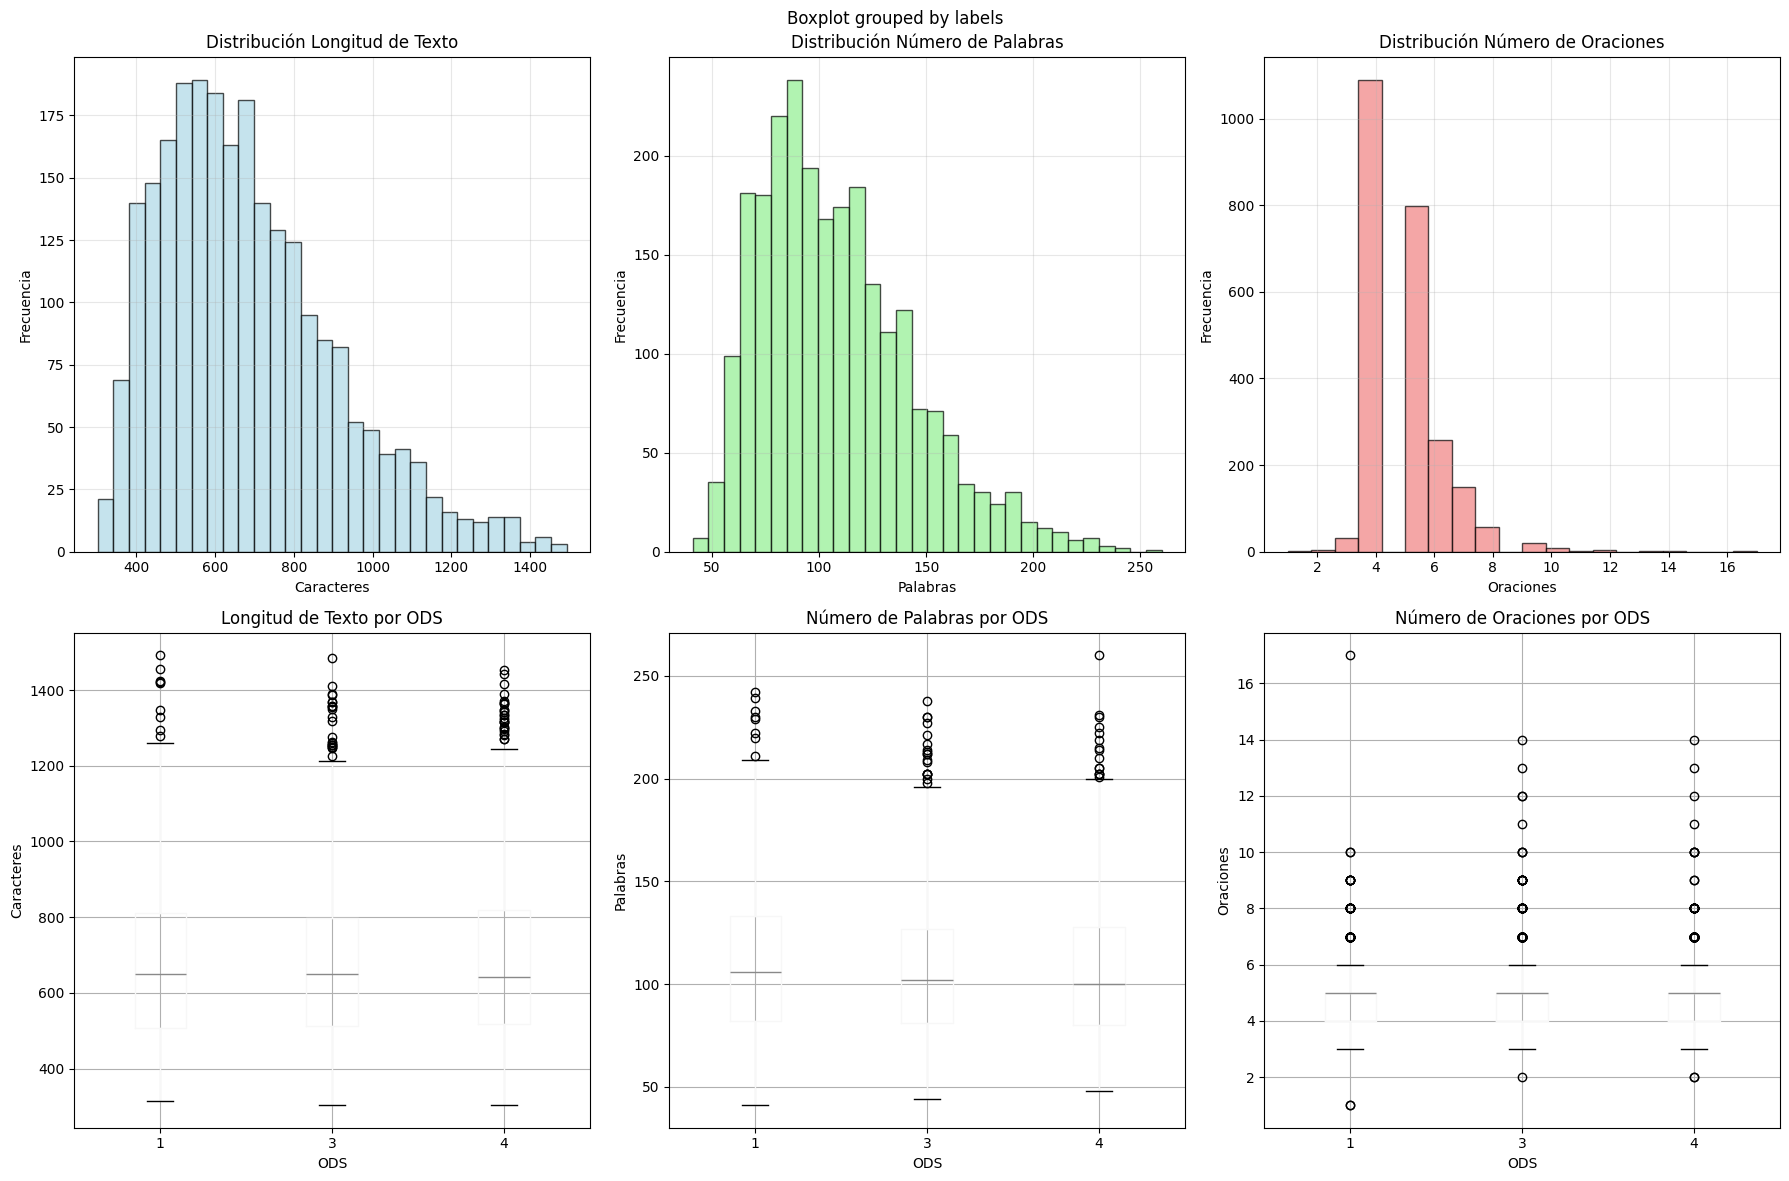


=== ESTADÍSTICAS POR CLASE ODS ===

ODS 1 - Fin de la pobreza:
  Cantidad de textos: 505
  Longitud promedio: 680.6 caracteres
  Palabras promedio: 110.4 palabras
  Oraciones promedio: 5.0 oraciones
  Longitud mínima: 313 caracteres
  Longitud máxima: 1492 caracteres

ODS 3 - Salud y bienestar:
  Cantidad de textos: 894
  Longitud promedio: 681.0 caracteres
  Palabras promedio: 108.0 palabras
  Oraciones promedio: 4.9 oraciones
  Longitud mínima: 303 caracteres
  Longitud máxima: 1486 caracteres

ODS 4 - Educación de calidad:
  Cantidad de textos: 1025
  Longitud promedio: 686.5 caracteres
  Palabras promedio: 106.6 palabras
  Oraciones promedio: 4.8 oraciones
  Longitud mínima: 304 caracteres
  Longitud máxima: 1452 caracteres

=== EJEMPLOS DE TEXTOS ===
TEXTO MÁS CORTO:
Longitud: 303 caracteres
ODS: 3 (ODS 3 - Salud y bienestar)
Texto: En 2014, Bután fue testigo del mayor número de casos de drogas jamás registrado por las autoridades (644 casos). La gran mayoría (90%) estaban relaci

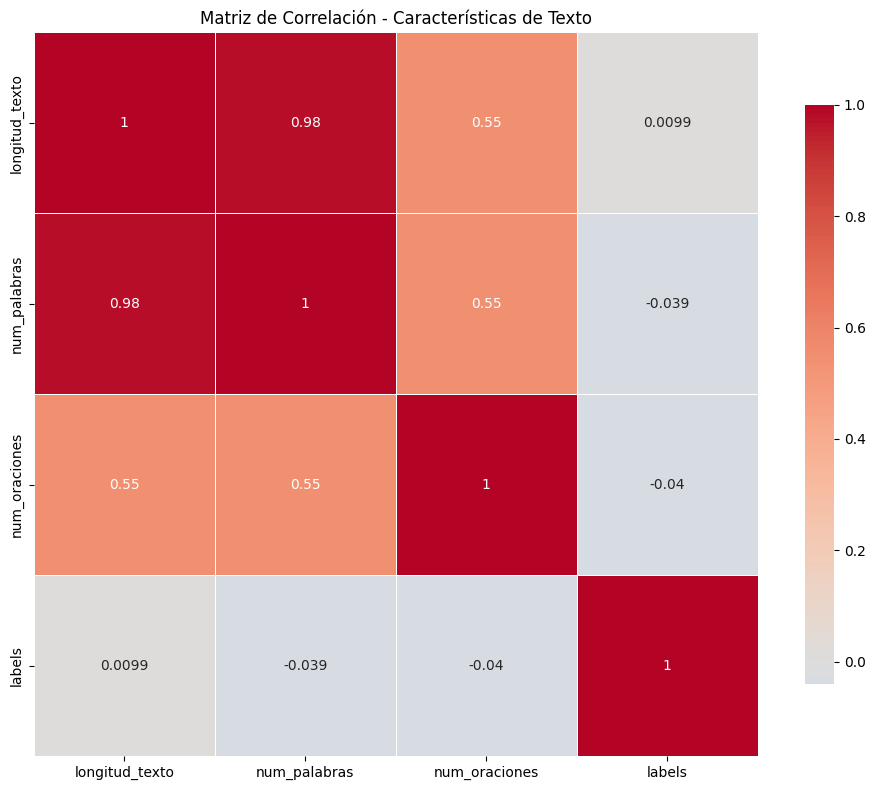

In [8]:
# Análisis de la columna de textos
print("=== ANÁLISIS DE TEXTO: textos ===")

# Estadísticas básicas del texto
datos_entrenamiento['longitud_texto'] = datos_entrenamiento['textos'].astype(str).str.len()
datos_entrenamiento['num_palabras'] = datos_entrenamiento['textos'].astype(str).str.split().str.len()
datos_entrenamiento['num_oraciones'] = datos_entrenamiento['textos'].astype(str).str.count('\.') + 1

print("=== ESTADÍSTICAS GENERALES ===")
print("Longitud de texto (caracteres):")
print(datos_entrenamiento['longitud_texto'].describe())

print("\nNúmero de palabras:")
print(datos_entrenamiento['num_palabras'].describe())

print("\nNúmero de oraciones:")
print(datos_entrenamiento['num_oraciones'].describe())

# Visualizaciones generales
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Histograma longitud de texto
axes[0,0].hist(datos_entrenamiento['longitud_texto'], bins=30, alpha=0.7, color='lightblue', edgecolor='black')
axes[0,0].set_title('Distribución Longitud de Texto')
axes[0,0].set_xlabel('Caracteres')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].grid(True, alpha=0.3)

# Histograma número de palabras
axes[0,1].hist(datos_entrenamiento['num_palabras'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Distribución Número de Palabras')
axes[0,1].set_xlabel('Palabras')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].grid(True, alpha=0.3)

# Histograma número de oraciones
axes[0,2].hist(datos_entrenamiento['num_oraciones'], bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0,2].set_title('Distribución Número de Oraciones')
axes[0,2].set_xlabel('Oraciones')
axes[0,2].set_ylabel('Frecuencia')
axes[0,2].grid(True, alpha=0.3)

# Box plots por clase ODS
datos_entrenamiento.boxplot(column='longitud_texto', by='labels', ax=axes[1,0])
axes[1,0].set_title('Longitud de Texto por ODS')
axes[1,0].set_xlabel('ODS')
axes[1,0].set_ylabel('Caracteres')

datos_entrenamiento.boxplot(column='num_palabras', by='labels', ax=axes[1,1])
axes[1,1].set_title('Número de Palabras por ODS')
axes[1,1].set_xlabel('ODS')
axes[1,1].set_ylabel('Palabras')

datos_entrenamiento.boxplot(column='num_oraciones', by='labels', ax=axes[1,2])
axes[1,2].set_title('Número de Oraciones por ODS')
axes[1,2].set_xlabel('ODS')
axes[1,2].set_ylabel('Oraciones')

plt.tight_layout()
plt.show()

# Estadísticas por clase ODS
mapeo_ods = {
    1: "ODS 1 - Fin de la pobreza",
    3: "ODS 3 - Salud y bienestar", 
    4: "ODS 4 - Educación de calidad"
}

print("\n=== ESTADÍSTICAS POR CLASE ODS ===")
for label in sorted(datos_entrenamiento['labels'].unique()):
    subset = datos_entrenamiento[datos_entrenamiento['labels'] == label]
    print(f"\n{mapeo_ods[label]}:")
    print(f"  Cantidad de textos: {len(subset)}")
    print(f"  Longitud promedio: {subset['longitud_texto'].mean():.1f} caracteres")
    print(f"  Palabras promedio: {subset['num_palabras'].mean():.1f} palabras")
    print(f"  Oraciones promedio: {subset['num_oraciones'].mean():.1f} oraciones")
    print(f"  Longitud mínima: {subset['longitud_texto'].min()} caracteres")
    print(f"  Longitud máxima: {subset['longitud_texto'].max()} caracteres")

# Ejemplos de textos por clase y longitud
print("\n=== EJEMPLOS DE TEXTOS ===")

# Texto más corto y más largo general
idx_corto = datos_entrenamiento['longitud_texto'].idxmin()
idx_largo = datos_entrenamiento['longitud_texto'].idxmax()

print("TEXTO MÁS CORTO:")
print(f"Longitud: {datos_entrenamiento.loc[idx_corto, 'longitud_texto']} caracteres")
print(f"ODS: {datos_entrenamiento.loc[idx_corto, 'labels']} ({mapeo_ods[datos_entrenamiento.loc[idx_corto, 'labels']]})")
print(f"Texto: {datos_entrenamiento.loc[idx_corto, 'textos']}")

print("\nTEXTO MÁS LARGO:")
print(f"Longitud: {datos_entrenamiento.loc[idx_largo, 'longitud_texto']} caracteres")
print(f"ODS: {datos_entrenamiento.loc[idx_largo, 'labels']} ({mapeo_ods[datos_entrenamiento.loc[idx_largo, 'labels']]})")
print(f"Texto: {datos_entrenamiento.loc[idx_largo, 'textos'][:300]}...")

# Ejemplo de texto por cada ODS
print("\n=== EJEMPLOS POR CLASE ODS ===")
for label in sorted(datos_entrenamiento['labels'].unique()):
    subset = datos_entrenamiento[datos_entrenamiento['labels'] == label]
    ejemplo_idx = subset.index[0]  # Primer ejemplo de cada clase
    print(f"\n{mapeo_ods[label]}:")
    print(f"Longitud: {datos_entrenamiento.loc[ejemplo_idx, 'longitud_texto']} caracteres")
    print(f"Ejemplo: {datos_entrenamiento.loc[ejemplo_idx, 'textos'][:250]}...")

# Análisis de correlación entre características de texto
print("\n=== CORRELACIÓN ENTRE CARACTERÍSTICAS ===")
correlacion = datos_entrenamiento[['longitud_texto', 'num_palabras', 'num_oraciones', 'labels']].corr()
print(correlacion)

# Visualización de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación - Características de Texto')
plt.tight_layout()
plt.show()

=== DETECCIÓN DE OUTLIERS ===

Longitud de texto:
  Q1: 513.0, Q3: 809.2, IQR: 296.2
  Rango normal: [68.6, 1253.6]
  Outliers detectados: 54
  Porcentaje de outliers: 2.23%
  Valores outliers - Min: 1254.0, Max: 1492.0

Número de palabras:
  Q1: 81.0, Q3: 129.0, IQR: 48.0
  Rango normal: [9.0, 201.0]
  Outliers detectados: 41
  Porcentaje de outliers: 1.69%
  Valores outliers - Min: 202.0, Max: 260.0

Número de oraciones:
  Q1: 4.0, Q3: 5.0, IQR: 1.0
  Rango normal: [2.5, 6.5]
  Outliers detectados: 250
  Porcentaje de outliers: 10.31%
  Valores outliers - Min: 1.0, Max: 17.0

=== RESUMEN DE OUTLIERS ===
Total de registros con outliers: 267
Porcentaje del dataset: 11.01%

=== DISTRIBUCIÓN DE OUTLIERS POR CLASE ===
  ODS 1 - Fin de la pobreza: 64/505 (12.7%)
  ODS 3 - Salud y bienestar: 105/894 (11.7%)
  ODS 4 - Educación de calidad: 98/1025 (9.6%)


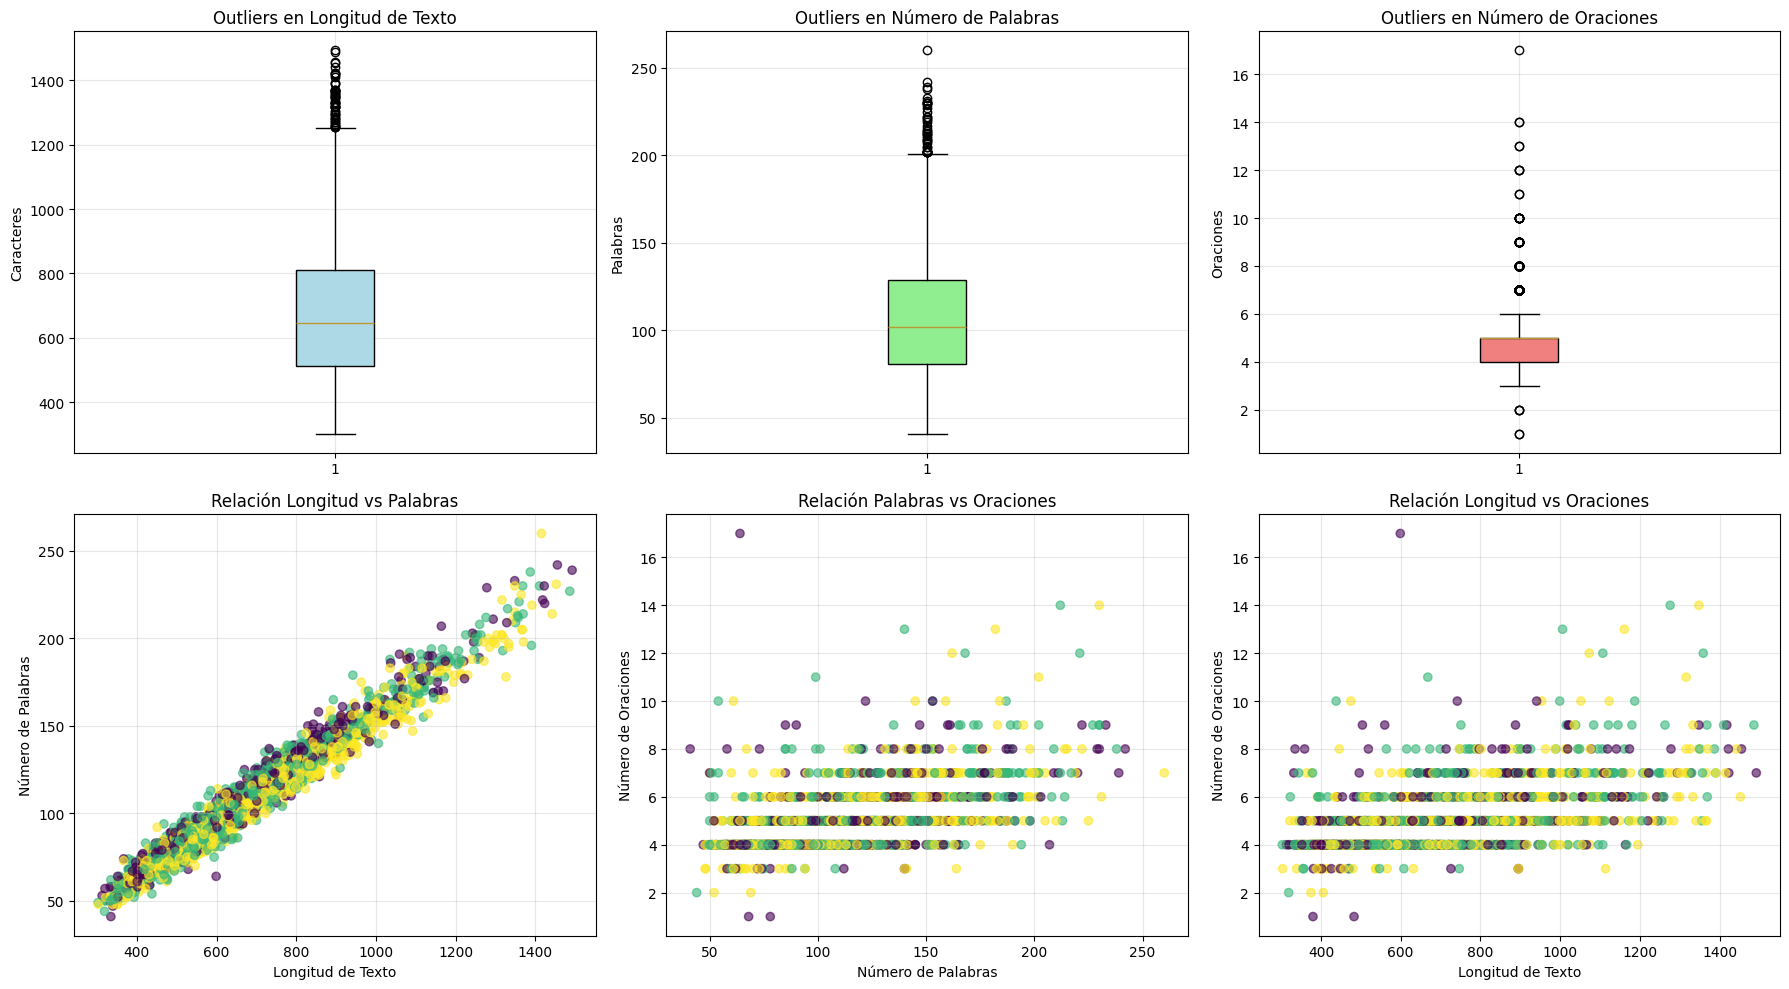


=== EJEMPLOS DE OUTLIERS ===

OUTLIER - MAYOR LONGITUD (índice 2272):
  ODS: 1 (ODS 1 - Fin de la pobreza)
  Longitud: 1492 caracteres
  Palabras: 239
  Oraciones: 7
  Texto: A medida que la propiedad de la vivienda se vuelve más inaccesible para las familias en el extremo inferior de la distribución socioeconómica, las intervenciones de políticas de vivienda deben centrar...

OUTLIER - MAYOR NÚMERO DE PALABRAS (índice 1015):
  ODS: 4 (ODS 4 - Educación de calidad)
  Longitud: 1415 caracteres
  Palabras: 260
  Oraciones: 7
  Texto: El cuarenta y tres por ciento de las personas de 25 a 34 años han completado la educación secundaria (en comparación con el promedio de la OCDE del 82 %) y el 19 % han obtenido la educación terciaria ...

OUTLIER - MAYOR NÚMERO DE ORACIONES (índice 631):
  ODS: 1 (ODS 1 - Fin de la pobreza)
  Longitud: 599 caracteres
  Palabras: 64
  Oraciones: 17
  Texto: Hijos de la austeridad: impacto de la gran recesión en la pobreza infantil en los países ricos, Oxford

In [10]:
# Detección de outliers en características de texto
print("=== DETECCIÓN DE OUTLIERS ===")

def detectar_outliers_iqr(serie, nombre):
    """Detecta outliers usando el método IQR"""
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = serie[(serie < limite_inferior) | (serie > limite_superior)]
    
    print(f"\n{nombre}:")
    print(f"  Q1: {Q1:.1f}, Q3: {Q3:.1f}, IQR: {IQR:.1f}")
    print(f"  Rango normal: [{limite_inferior:.1f}, {limite_superior:.1f}]")
    print(f"  Outliers detectados: {len(outliers)}")
    print(f"  Porcentaje de outliers: {len(outliers)/len(serie)*100:.2f}%")
    
    if len(outliers) > 0:
        print(f"  Valores outliers - Min: {outliers.min():.1f}, Max: {outliers.max():.1f}")
    
    return outliers.index.tolist()

# Detectar outliers en longitud de texto
outliers_longitud = detectar_outliers_iqr(datos_entrenamiento['longitud_texto'], 'Longitud de texto')

# Detectar outliers en número de palabras
outliers_palabras = detectar_outliers_iqr(datos_entrenamiento['num_palabras'], 'Número de palabras')

# Detectar outliers en número de oraciones
outliers_oraciones = detectar_outliers_iqr(datos_entrenamiento['num_oraciones'], 'Número de oraciones')

# Outliers combinados
outliers_combinados = list(set(outliers_longitud + outliers_palabras + outliers_oraciones))
print(f"\n=== RESUMEN DE OUTLIERS ===")
print(f"Total de registros con outliers: {len(outliers_combinados)}")
print(f"Porcentaje del dataset: {len(outliers_combinados)/len(datos_entrenamiento)*100:.2f}%")

# Análisis de outliers por clase
print(f"\n=== DISTRIBUCIÓN DE OUTLIERS POR CLASE ===")
if len(outliers_combinados) > 0:
    outliers_por_clase = datos_entrenamiento.loc[outliers_combinados, 'labels'].value_counts().sort_index()
    for label in sorted(datos_entrenamiento['labels'].unique()):
        total_clase = len(datos_entrenamiento[datos_entrenamiento['labels'] == label])
        outliers_clase = outliers_por_clase.get(label, 0)
        porcentaje = (outliers_clase / total_clase) * 100
        print(f"  {mapeo_ods[label]}: {outliers_clase}/{total_clase} ({porcentaje:.1f}%)")

# Visualización de outliers
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Box plots con outliers marcados
axes[0,0].boxplot(datos_entrenamiento['longitud_texto'], patch_artist=True, 
                  boxprops=dict(facecolor='lightblue'))
axes[0,0].set_title('Outliers en Longitud de Texto')
axes[0,0].set_ylabel('Caracteres')
axes[0,0].grid(True, alpha=0.3)

axes[0,1].boxplot(datos_entrenamiento['num_palabras'], patch_artist=True,
                  boxprops=dict(facecolor='lightgreen'))
axes[0,1].set_title('Outliers en Número de Palabras')
axes[0,1].set_ylabel('Palabras')
axes[0,1].grid(True, alpha=0.3)

axes[0,2].boxplot(datos_entrenamiento['num_oraciones'], patch_artist=True,
                  boxprops=dict(facecolor='lightcoral'))
axes[0,2].set_title('Outliers en Número de Oraciones')
axes[0,2].set_ylabel('Oraciones')
axes[0,2].grid(True, alpha=0.3)

# Scatter plots para identificar patrones en outliers
axes[1,0].scatter(datos_entrenamiento['longitud_texto'], datos_entrenamiento['num_palabras'], 
                  alpha=0.6, c=datos_entrenamiento['labels'], cmap='viridis')
axes[1,0].set_xlabel('Longitud de Texto')
axes[1,0].set_ylabel('Número de Palabras')
axes[1,0].set_title('Relación Longitud vs Palabras')
axes[1,0].grid(True, alpha=0.3)

axes[1,1].scatter(datos_entrenamiento['num_palabras'], datos_entrenamiento['num_oraciones'], 
                  alpha=0.6, c=datos_entrenamiento['labels'], cmap='viridis')
axes[1,1].set_xlabel('Número de Palabras')
axes[1,1].set_ylabel('Número de Oraciones')
axes[1,1].set_title('Relación Palabras vs Oraciones')
axes[1,1].grid(True, alpha=0.3)

axes[1,2].scatter(datos_entrenamiento['longitud_texto'], datos_entrenamiento['num_oraciones'], 
                  alpha=0.6, c=datos_entrenamiento['labels'], cmap='viridis')
axes[1,2].set_xlabel('Longitud de Texto')
axes[1,2].set_ylabel('Número de Oraciones')
axes[1,2].set_title('Relación Longitud vs Oraciones')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Examinar algunos outliers específicos
if len(outliers_combinados) > 0:
    print("\n=== EJEMPLOS DE OUTLIERS ===")
    
    # Seleccionar outliers más extremos
    outliers_df = datos_entrenamiento.loc[outliers_combinados].copy()
    
    # Outlier con mayor longitud
    if len(outliers_longitud) > 0:
        idx_max_longitud = datos_entrenamiento.loc[outliers_longitud, 'longitud_texto'].idxmax()
        print(f"\nOUTLIER - MAYOR LONGITUD (índice {idx_max_longitud}):")
        print(f"  ODS: {datos_entrenamiento.loc[idx_max_longitud, 'labels']} ({mapeo_ods[datos_entrenamiento.loc[idx_max_longitud, 'labels']]})")
        print(f"  Longitud: {datos_entrenamiento.loc[idx_max_longitud, 'longitud_texto']} caracteres")
        print(f"  Palabras: {datos_entrenamiento.loc[idx_max_longitud, 'num_palabras']}")
        print(f"  Oraciones: {datos_entrenamiento.loc[idx_max_longitud, 'num_oraciones']}")
        print(f"  Texto: {datos_entrenamiento.loc[idx_max_longitud, 'textos'][:200]}...")
    
    # Outlier con mayor número de palabras
    if len(outliers_palabras) > 0:
        idx_max_palabras = datos_entrenamiento.loc[outliers_palabras, 'num_palabras'].idxmax()
        print(f"\nOUTLIER - MAYOR NÚMERO DE PALABRAS (índice {idx_max_palabras}):")
        print(f"  ODS: {datos_entrenamiento.loc[idx_max_palabras, 'labels']} ({mapeo_ods[datos_entrenamiento.loc[idx_max_palabras, 'labels']]})")
        print(f"  Longitud: {datos_entrenamiento.loc[idx_max_palabras, 'longitud_texto']} caracteres")
        print(f"  Palabras: {datos_entrenamiento.loc[idx_max_palabras, 'num_palabras']}")
        print(f"  Oraciones: {datos_entrenamiento.loc[idx_max_palabras, 'num_oraciones']}")
        print(f"  Texto: {datos_entrenamiento.loc[idx_max_palabras, 'textos'][:200]}...")
    
    # Outlier con mayor número de oraciones
    if len(outliers_oraciones) > 0:
        idx_max_oraciones = datos_entrenamiento.loc[outliers_oraciones, 'num_oraciones'].idxmax()
        print(f"\nOUTLIER - MAYOR NÚMERO DE ORACIONES (índice {idx_max_oraciones}):")
        print(f"  ODS: {datos_entrenamiento.loc[idx_max_oraciones, 'labels']} ({mapeo_ods[datos_entrenamiento.loc[idx_max_oraciones, 'labels']]})")
        print(f"  Longitud: {datos_entrenamiento.loc[idx_max_oraciones, 'longitud_texto']} caracteres")
        print(f"  Palabras: {datos_entrenamiento.loc[idx_max_oraciones, 'num_palabras']}")
        print(f"  Oraciones: {datos_entrenamiento.loc[idx_max_oraciones, 'num_oraciones']}")
        print(f"  Texto: {datos_entrenamiento.loc[idx_max_oraciones, 'textos'][:200]}...")


<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\.'
/var/folders/lq/6ckcdm_n3m1157w0f2myr3100000gp/T/ipykernel_4736/1483680913.py:7: SyntaxWarning: invalid escape sequence '\.'
  datos_prueba['num_oraciones'] = datos_prueba['Textos_espanol'].astype(str).str.count('\.') + 1
/var/folders/lq/6ckcdm_n3m1157w0f2myr3100000gp/T/ipykernel_4736/1483680913.py:92: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot(data_longitud, labels=['Entrenamiento', 'Prueba'], patch_artist=True,
/var/folders/lq/6ckcdm_n3m1157w0f2myr3100000gp/T/ipykernel_4736/1483680913.py:99: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,1].boxplot(data_palabras, labels=['Entrenamiento', 'Prueba'], patch_artist=Tr

=== ANÁLISIS DATASET DE PRUEBA ===
=== ESTADÍSTICAS DATASET DE PRUEBA ===
Longitud de texto (caracteres):
count     152.000000
mean      677.638158
std       218.683798
min       340.000000
25%       521.000000
50%       619.500000
75%       817.500000
max      1298.000000
Name: longitud_texto, dtype: float64

Número de palabras:
count    152.000000
mean     108.065789
std       33.878370
min       53.000000
25%       85.500000
50%      100.500000
75%      126.250000
max      210.000000
Name: num_palabras, dtype: float64

Número de oraciones:
count    152.000000
mean       4.934211
std        1.210720
min        4.000000
25%        4.000000
50%        5.000000
75%        5.000000
max       10.000000
Name: num_oraciones, dtype: float64

=== COMPARACIÓN ENTRENAMIENTO vs PRUEBA ===
                     Entrenamiento_Media  Prueba_Media  Entrenamiento_Std  \
Longitud_caracteres               683.22        677.64             223.56   
Num_palabras                      107.92        108.07  

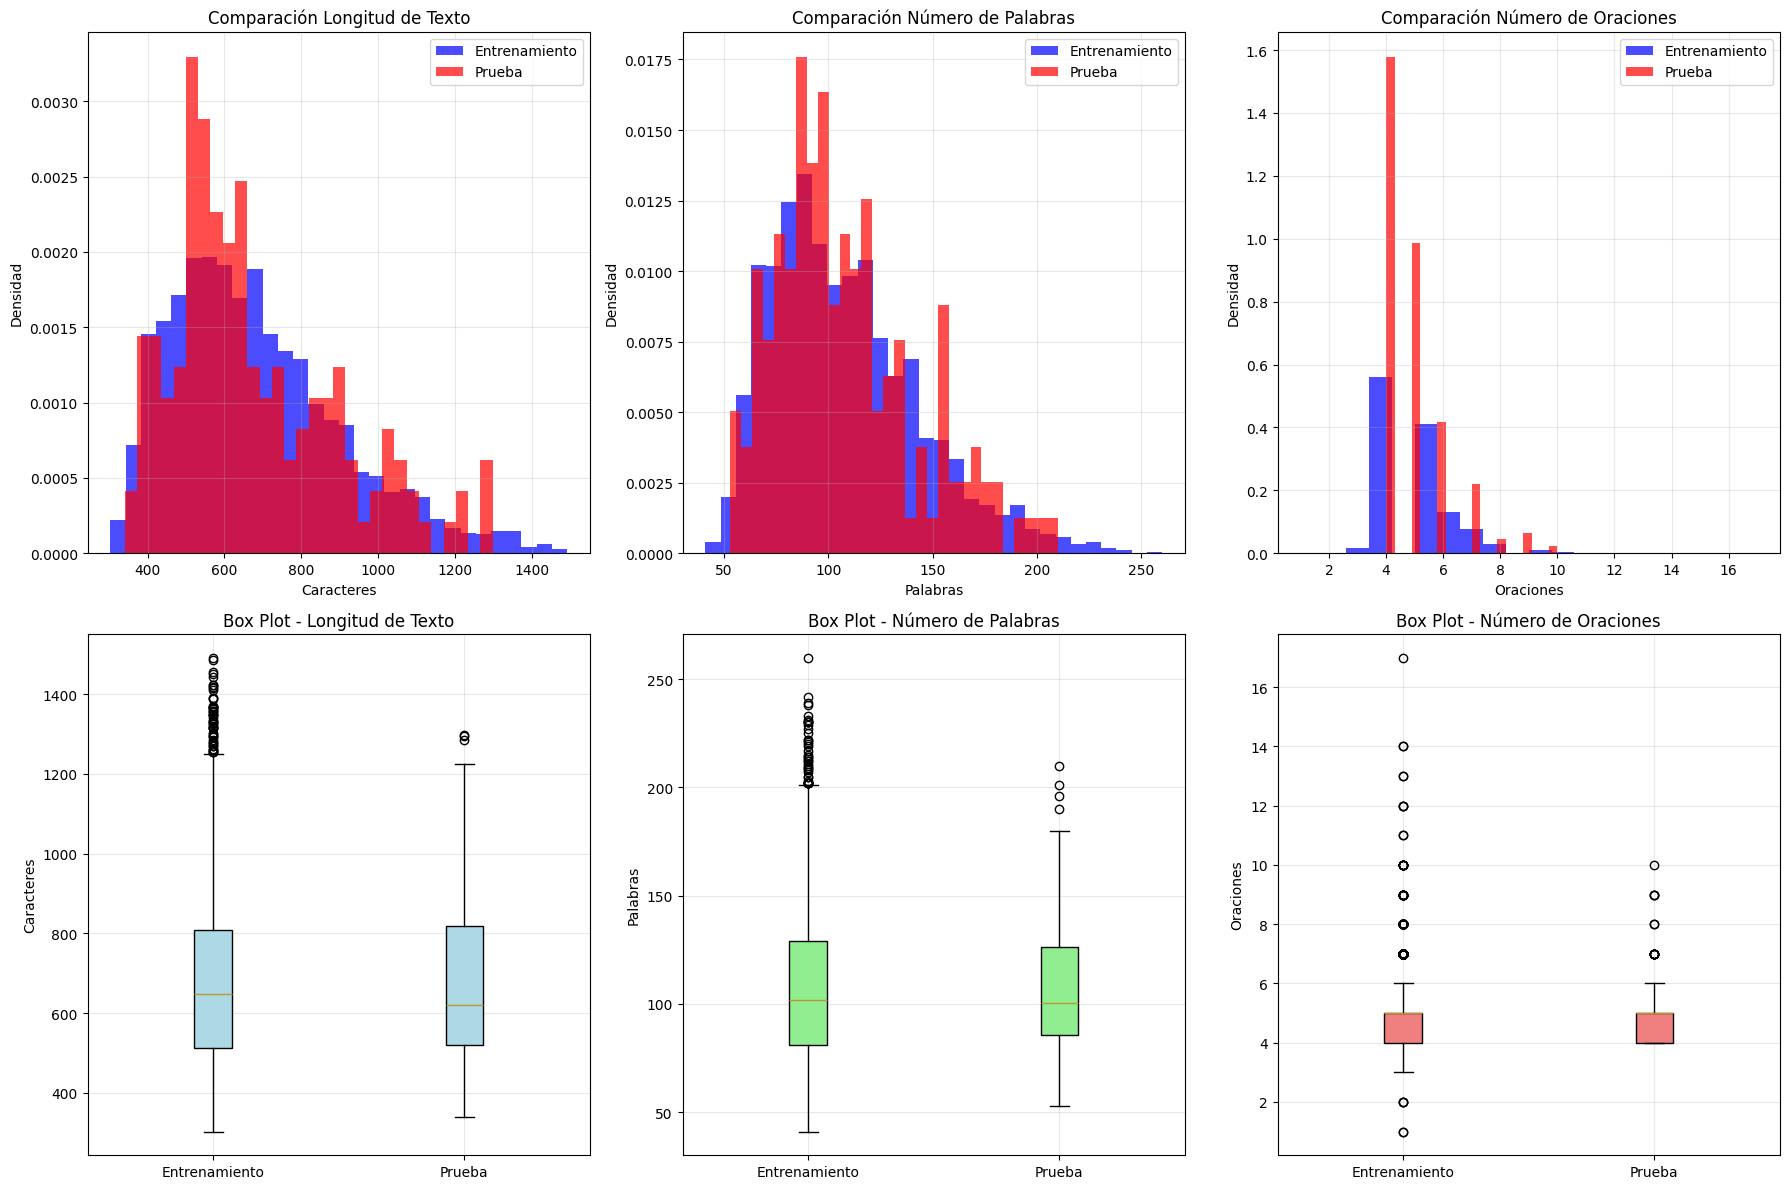


=== OUTLIERS EN DATASET DE PRUEBA ===

Longitud de texto:
  Outliers detectados: 3
  Porcentaje: 1.97%
  Valores outliers - Min: 1285.0, Max: 1298.0

Número de palabras:
  Outliers detectados: 1
  Porcentaje: 0.66%
  Valores outliers - Min: 210.0, Max: 210.0

Número de oraciones:
  Outliers detectados: 16
  Porcentaje: 10.53%
  Valores outliers - Min: 7.0, Max: 10.0

=== EJEMPLOS DATASET DE PRUEBA ===
Primeros 3 textos:

Texto 1:
  Longitud: 651 caracteres
  Palabras: 98
  Oraciones: 5
  Texto: El rector, que es el representante local del Ministerio de Educación, tiene la responsabilidad principal de procesar la evaluación. A pesar de esta centralización, el sistema francés se basa en gran m...

Texto 2:
  Longitud: 419 caracteres
  Palabras: 57
  Oraciones: 4
  Texto: Tenga en cuenta que todos los programas antipobreza tienen condiciones, incluso aquellos caracterizados como 'incondicionales'. Nuestro enfoque está en las condiciones de comportamiento vinculadas a l...

Texto 3:
  Lon

In [12]:
# Análisis del dataset de prueba
print("=== ANÁLISIS DATASET DE PRUEBA ===")

# Estadísticas básicas del dataset de prueba
datos_prueba['longitud_texto'] = datos_prueba['Textos_espanol'].astype(str).str.len()
datos_prueba['num_palabras'] = datos_prueba['Textos_espanol'].astype(str).str.split().str.len()
datos_prueba['num_oraciones'] = datos_prueba['Textos_espanol'].astype(str).str.count('\.') + 1

print("=== ESTADÍSTICAS DATASET DE PRUEBA ===")
print("Longitud de texto (caracteres):")
print(datos_prueba['longitud_texto'].describe())

print("\nNúmero de palabras:")
print(datos_prueba['num_palabras'].describe())

print("\nNúmero de oraciones:")
print(datos_prueba['num_oraciones'].describe())

# Comparación entre datasets de entrenamiento y prueba
print("\n=== COMPARACIÓN ENTRENAMIENTO vs PRUEBA ===")
comparacion = pd.DataFrame({
    'Entrenamiento_Media': [
        datos_entrenamiento['longitud_texto'].mean(),
        datos_entrenamiento['num_palabras'].mean(),
        datos_entrenamiento['num_oraciones'].mean()
    ],
    'Prueba_Media': [
        datos_prueba['longitud_texto'].mean(),
        datos_prueba['num_palabras'].mean(),
        datos_prueba['num_oraciones'].mean()
    ],
    'Entrenamiento_Std': [
        datos_entrenamiento['longitud_texto'].std(),
        datos_entrenamiento['num_palabras'].std(),
        datos_entrenamiento['num_oraciones'].std()
    ],
    'Prueba_Std': [
        datos_prueba['longitud_texto'].std(),
        datos_prueba['num_palabras'].std(),
        datos_prueba['num_oraciones'].std()
    ]
}, index=['Longitud_caracteres', 'Num_palabras', 'Num_oraciones'])

print(comparacion.round(2))

# Diferencias porcentuales
print("\n=== DIFERENCIAS PORCENTUALES (Prueba vs Entrenamiento) ===")
for caracteristica in ['longitud_texto', 'num_palabras', 'num_oraciones']:
    media_entreno = datos_entrenamiento[caracteristica].mean()
    media_prueba = datos_prueba[caracteristica].mean()
    diferencia_pct = ((media_prueba - media_entreno) / media_entreno) * 100
    print(f"{caracteristica}: {diferencia_pct:+.2f}%")

# Visualización comparativa
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Comparación de longitud de texto
axes[0,0].hist(datos_entrenamiento['longitud_texto'], bins=30, alpha=0.7, 
               label='Entrenamiento', color='blue', density=True)
axes[0,0].hist(datos_prueba['longitud_texto'], bins=30, alpha=0.7, 
               label='Prueba', color='red', density=True)
axes[0,0].set_title('Comparación Longitud de Texto')
axes[0,0].set_xlabel('Caracteres')
axes[0,0].set_ylabel('Densidad')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Comparación de número de palabras
axes[0,1].hist(datos_entrenamiento['num_palabras'], bins=30, alpha=0.7, 
               label='Entrenamiento', color='blue', density=True)
axes[0,1].hist(datos_prueba['num_palabras'], bins=30, alpha=0.7, 
               label='Prueba', color='red', density=True)
axes[0,1].set_title('Comparación Número de Palabras')
axes[0,1].set_xlabel('Palabras')
axes[0,1].set_ylabel('Densidad')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Comparación de número de oraciones
axes[0,2].hist(datos_entrenamiento['num_oraciones'], bins=20, alpha=0.7, 
               label='Entrenamiento', color='blue', density=True)
axes[0,2].hist(datos_prueba['num_oraciones'], bins=20, alpha=0.7, 
               label='Prueba', color='red', density=True)
axes[0,2].set_title('Comparación Número de Oraciones')
axes[0,2].set_xlabel('Oraciones')
axes[0,2].set_ylabel('Densidad')
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

# Box plots comparativos
data_longitud = [datos_entrenamiento['longitud_texto'], datos_prueba['longitud_texto']]
axes[1,0].boxplot(data_longitud, labels=['Entrenamiento', 'Prueba'], patch_artist=True,
                  boxprops=dict(facecolor='lightblue'))
axes[1,0].set_title('Box Plot - Longitud de Texto')
axes[1,0].set_ylabel('Caracteres')
axes[1,0].grid(True, alpha=0.3)

data_palabras = [datos_entrenamiento['num_palabras'], datos_prueba['num_palabras']]
axes[1,1].boxplot(data_palabras, labels=['Entrenamiento', 'Prueba'], patch_artist=True,
                  boxprops=dict(facecolor='lightgreen'))
axes[1,1].set_title('Box Plot - Número de Palabras')
axes[1,1].set_ylabel('Palabras')
axes[1,1].grid(True, alpha=0.3)

data_oraciones = [datos_entrenamiento['num_oraciones'], datos_prueba['num_oraciones']]
axes[1,2].boxplot(data_oraciones, labels=['Entrenamiento', 'Prueba'], patch_artist=True,
                  boxprops=dict(facecolor='lightcoral'))
axes[1,2].set_title('Box Plot - Número de Oraciones')
axes[1,2].set_ylabel('Oraciones')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis de outliers en dataset de prueba
print("\n=== OUTLIERS EN DATASET DE PRUEBA ===")

def detectar_outliers_prueba(serie, nombre, limites_entrenamiento=None):
    """Detecta outliers en dataset de prueba usando límites del entrenamiento"""
    if limites_entrenamiento:
        limite_inf, limite_sup = limites_entrenamiento
        outliers = serie[(serie < limite_inf) | (serie > limite_sup)]
    else:
        Q1 = serie.quantile(0.25)
        Q3 = serie.quantile(0.75)
        IQR = Q3 - Q1
        limite_inf = Q1 - 1.5 * IQR
        limite_sup = Q3 + 1.5 * IQR
        outliers = serie[(serie < limite_inf) | (serie > limite_sup)]
    
    print(f"\n{nombre}:")
    print(f"  Outliers detectados: {len(outliers)}")
    print(f"  Porcentaje: {len(outliers)/len(serie)*100:.2f}%")
    if len(outliers) > 0:
        print(f"  Valores outliers - Min: {outliers.min():.1f}, Max: {outliers.max():.1f}")
    
    return outliers.index.tolist()

# Usar límites del entrenamiento para detectar outliers en prueba
Q1_long = datos_entrenamiento['longitud_texto'].quantile(0.25)
Q3_long = datos_entrenamiento['longitud_texto'].quantile(0.75)
IQR_long = Q3_long - Q1_long
limites_longitud = (Q1_long - 1.5 * IQR_long, Q3_long + 1.5 * IQR_long)

Q1_pal = datos_entrenamiento['num_palabras'].quantile(0.25)
Q3_pal = datos_entrenamiento['num_palabras'].quantile(0.75)
IQR_pal = Q3_pal - Q1_pal
limites_palabras = (Q1_pal - 1.5 * IQR_pal, Q3_pal + 1.5 * IQR_pal)

Q1_or = datos_entrenamiento['num_oraciones'].quantile(0.25)
Q3_or = datos_entrenamiento['num_oraciones'].quantile(0.75)
IQR_or = Q3_or - Q1_or
limites_oraciones = (Q1_or - 1.5 * IQR_or, Q3_or + 1.5 * IQR_or)

outliers_prueba_long = detectar_outliers_prueba(datos_prueba['longitud_texto'], 
                                               'Longitud de texto', limites_longitud)
outliers_prueba_pal = detectar_outliers_prueba(datos_prueba['num_palabras'], 
                                              'Número de palabras', limites_palabras)
outliers_prueba_or = detectar_outliers_prueba(datos_prueba['num_oraciones'], 
                                             'Número de oraciones', limites_oraciones)

# Ejemplos del dataset de prueba
print("\n=== EJEMPLOS DATASET DE PRUEBA ===")
print("Primeros 3 textos:")
for i in range(min(3, len(datos_prueba))):
    print(f"\nTexto {i+1}:")
    print(f"  Longitud: {datos_prueba.loc[i, 'longitud_texto']} caracteres")
    print(f"  Palabras: {datos_prueba.loc[i, 'num_palabras']}")
    print(f"  Oraciones: {datos_prueba.loc[i, 'num_oraciones']}")
    print(f"  Texto: {datos_prueba.loc[i, 'Textos_espanol'][:200]}...")

# Texto más largo y más corto del dataset de prueba
idx_corto_prueba = datos_prueba['longitud_texto'].idxmin()
idx_largo_prueba = datos_prueba['longitud_texto'].idxmax()

print(f"\nTEXTO MÁS CORTO EN PRUEBA:")
print(f"  Longitud: {datos_prueba.loc[idx_corto_prueba, 'longitud_texto']} caracteres")
print(f"  Texto: {datos_prueba.loc[idx_corto_prueba, 'Textos_espanol']}")

print(f"\nTEXTO MÁS LARGO EN PRUEBA:")
print(f"  Longitud: {datos_prueba.loc[idx_largo_prueba, 'longitud_texto']} caracteres")
print(f"  Texto: {datos_prueba.loc[idx_largo_prueba, 'Textos_espanol'][:300]}...")

# Evaluación de compatibilidad entre datasets
print(f"\n=== EVALUACIÓN DE COMPATIBILIDAD ===")
compatibilidad_longitud = (datos_prueba['longitud_texto'].min() >= datos_entrenamiento['longitud_texto'].min() and 
                          datos_prueba['longitud_texto'].max() <= datos_entrenamiento['longitud_texto'].max())
compatibilidad_palabras = (datos_prueba['num_palabras'].min() >= datos_entrenamiento['num_palabras'].min() and 
                          datos_prueba['num_palabras'].max() <= datos_entrenamiento['num_palabras'].max())


# Resumen final
print(f"\n=== RESUMEN FINAL ANÁLISIS EXPLORATORIO ===")
print(f"Dataset de entrenamiento: {len(datos_entrenamiento)} textos, 3 clases ODS")
print(f"Dataset de prueba: {len(datos_prueba)} textos sin etiquetas")
print(f"Desbalance de clases: Ratio 2.03:1 (moderado)")
print(f"Outliers en entrenamiento: {len(set(outliers_longitud + outliers_palabras + outliers_oraciones))} textos ({len(set(outliers_longitud + outliers_palabras + outliers_oraciones))/len(datos_entrenamiento)*100:.1f}%)")
print(f"Compatibilidad datasets: {'Alta' if compatibilidad_longitud and compatibilidad_palabras else 'Moderada'}")

NLTK configurado correctamente
Total de stopwords: 366
=== LIMPIEZA DATASET DE ENTRENAMIENTO ===
Estadísticas después de limpieza:
Promedio de tokens por texto: 50.9
Mediana de tokens por texto: 48.0
Desviación estándar: 17.0

=== LIMPIEZA DATASET DE PRUEBA ===
Estadísticas después de limpieza:
Promedio de tokens por texto: 50.7
Mediana de tokens por texto: 47.0

=== EJEMPLOS DE LIMPIEZA ===

Ejemplo 1:
Original: "Aprendizaje" y "educación" se consideran sinónimos de escolarización formal. Las organizaciones aux...
Limpio: aprendizaje y educación se consideran sinónimos de escolarización formal las organizaciones auxiliar...
Tokens: ['aprendizaje', 'educación', 'consideran', 'sinónimos', 'escolarización', 'formal', 'organizaciones', 'auxiliares', 'editoriales', 'educación']
Número de tokens: 25

Ejemplo 2:
Original: Para los niños más pequeños (bebés y niños pequeños), la capacitación especializada y práctica parec...
Limpio: para los niños más pequeños bebés y niños pequeños la capaci

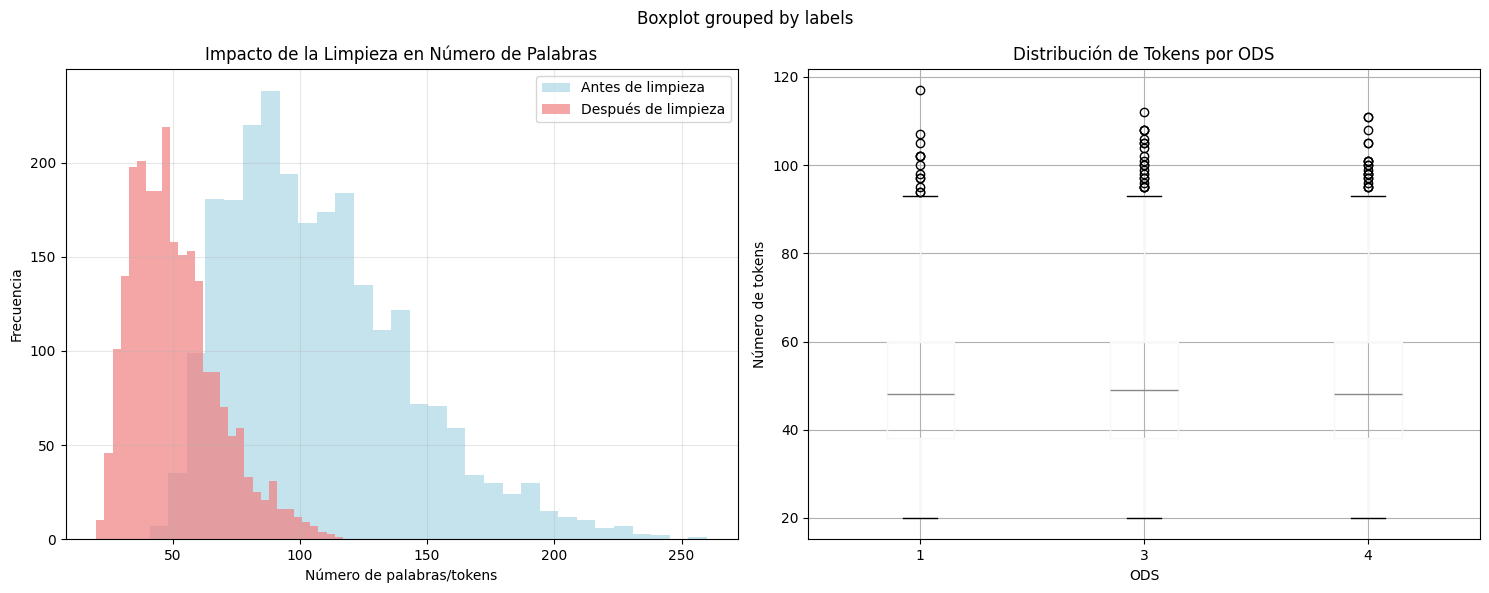


=== VERIFICACIÓN DE LIMPIEZA ===
Textos sin tokens: 0
Tokens mínimos: 20
Tokens máximos: 117


In [15]:
# Importar librerías adicionales para procesamiento de texto
import re
import string
from collections import Counter

# Intentar importar NLTK y descargar recursos
try:
    import nltk
    # Descargar recursos específicos
    nltk.download('stopwords', quiet=True)
    nltk.download('punkt', quiet=True)
    nltk.download('punkt_tab', quiet=True)  # Nueva versión de punkt
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    nltk_disponible = True
    print("NLTK configurado correctamente")
except Exception as e:
    print(f"Error con NLTK: {e}")
    print("Usando tokenización alternativa")
    nltk_disponible = False

# Configurar stopwords en español
if nltk_disponible:
    try:
        stop_words_es = set(stopwords.words('spanish'))
    except:
        print("Error cargando stopwords de NLTK, usando lista manual")
        nltk_disponible = False

# Lista manual de stopwords en español (backup)
if not nltk_disponible:
    stop_words_es = {
        'a', 'al', 'algo', 'algunas', 'algunos', 'ante', 'antes', 'como', 'con', 'contra', 'cual', 'cuando', 'de', 'del', 'desde', 'donde', 'durante', 'e', 'el', 'ella', 'ellas', 'ellos', 'en', 'entre', 'era', 'erais', 'eran', 'eras', 'eres', 'es', 'esa', 'esas', 'ese', 'eso', 'esos', 'esta', 'estaba', 'estabais', 'estaban', 'estabas', 'estad', 'estada', 'estadas', 'estado', 'estados', 'estamos', 'estando', 'estar', 'estaremos', 'estará', 'estarán', 'estarás', 'estaré', 'estaréis', 'estaría', 'estaríais', 'estaríamos', 'estarían', 'estarías', 'estas', 'este', 'estemos', 'esto', 'estos', 'estoy', 'estuve', 'estuviera', 'estuvierais', 'estuvieran', 'estuvieras', 'estuvieron', 'estuviese', 'estuvieseis', 'estuviesen', 'estuvieses', 'estuvimos', 'estuviste', 'estuvisteis', 'estuvo', 'está', 'estábamos', 'estáis', 'están', 'estás', 'esté', 'estéis', 'estén', 'estés', 'fue', 'fuera', 'fuerais', 'fueran', 'fueras', 'fueron', 'fuese', 'fueseis', 'fuesen', 'fueses', 'fui', 'fuimos', 'fuiste', 'fuisteis', 'ha', 'habida', 'habidas', 'habido', 'habidos', 'habiendo', 'habremos', 'habrá', 'habrán', 'habrás', 'habré', 'habréis', 'habría', 'habríais', 'habríamos', 'habrían', 'habrías', 'habéis', 'había', 'habíais', 'habíamos', 'habían', 'habías', 'han', 'has', 'hasta', 'hay', 'haya', 'hayamos', 'hayan', 'hayas', 'hayáis', 'he', 'hemos', 'hube', 'hubiera', 'hubierais', 'hubieran', 'hubieras', 'hubieron', 'hubiese', 'hubieseis', 'hubiesen', 'hubieses', 'hubimos', 'hubiste', 'hubisteis', 'hubo', 'la', 'las', 'le', 'les', 'lo', 'los', 'me', 'mi', 'mis', 'mucho', 'muchos', 'muy', 'más', 'mí', 'mía', 'mías', 'mío', 'míos', 'nada', 'ni', 'no', 'nos', 'nosotras', 'nosotros', 'nuestra', 'nuestras', 'nuestro', 'nuestros', 'o', 'os', 'otra', 'otras', 'otro', 'otros', 'para', 'pero', 'poco', 'por', 'porque', 'que', 'quien', 'quienes', 'qué', 'se', 'sea', 'seamos', 'sean', 'seas', 'sentid', 'sentida', 'sentidas', 'sentido', 'sentidos', 'seremos', 'será', 'serán', 'serás', 'seré', 'seréis', 'sería', 'seríais', 'seríamos', 'serían', 'serías', 'seáis', 'sido', 'siendo', 'sin', 'sobre', 'sois', 'somos', 'son', 'soy', 'su', 'sus', 'suya', 'suyas', 'suyo', 'suyos', 'sí', 'también', 'tanto', 'te', 'tendremos', 'tendrá', 'tendrán', 'tendrás', 'tendré', 'tendréis', 'tendría', 'tendríais', 'tendríamos', 'tendrían', 'tendrías', 'tened', 'tenemos', 'tenga', 'tengamos', 'tengan', 'tengas', 'tengo', 'tengáis', 'tenida', 'tenidas', 'tenido', 'tenidos', 'teniendo', 'tenéis', 'tenía', 'teníais', 'teníamos', 'tenían', 'tenías', 'ti', 'tiene', 'tienen', 'tienes', 'todo', 'todos', 'tu', 'tus', 'tuve', 'tuviera', 'tuvierais', 'tuvieran', 'tuvieras', 'tuvieron', 'tuviese', 'tuvieseis', 'tuviesen', 'tuvieses', 'tuvimos', 'tuviste', 'tuvisteis', 'tuvo', 'tuya', 'tuyas', 'tuyo', 'tuyos', 'tú', 'un', 'una', 'uno', 'unos', 'vosotras', 'vosotros', 'vuestra', 'vuestras', 'vuestro', 'vuestros', 'y', 'ya', 'yo', 'él', 'éramos'
    }

# Agregar stopwords adicionales específicas del dominio
stop_words_adicionales = {
    'además', 'así', 'ejemplo', 'casos', 'caso', 'años', 'año', 'país', 'países',
    'puede', 'pueden', 'debe', 'deben', 'hacer', 'través', 'mediante', 'forma',
    'manera', 'tipo', 'tipos', 'nivel', 'niveles', 'parte', 'partes', 'vez',
    'veces', 'tiempo', 'tiempos', 'lugar', 'lugares', 'número', 'números',
    'ser', 'estar', 'tener', 'haber', 'hacer', 'decir', 'dar', 'ver', 'saber',
    'ir', 'venir', 'llevar', 'pasar', 'seguir', 'poner', 'parecer', 'dejar',
    'encontrar', 'llamar', 'volver', 'empezar', 'creer', 'hablar', 'llevar'
}
stop_words_es.update(stop_words_adicionales)

print(f"Total de stopwords: {len(stop_words_es)}")

def limpiar_texto(texto):
    """
    Función para limpiar y preprocesar texto
    """
    # Convertir a string y minúsculas
    texto = str(texto).lower()
    
    # Remover comillas al inicio y final
    texto = texto.strip('"\'')
    
    # Remover URLs
    texto = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', texto)
    
    # Remover emails
    texto = re.sub(r'\S+@\S+', '', texto)
    
    # Remover números pero mantener palabras con números
    texto = re.sub(r'\b\d+\b', '', texto)
    
    # Remover puntuación pero mantener espacios
    texto = re.sub(r'[^\w\s]', ' ', texto)
    
    # Remover espacios múltiples
    texto = re.sub(r'\s+', ' ', texto)
    
    # Remover espacios al inicio y final
    texto = texto.strip()
    
    return texto

def tokenizar_simple(texto):
    """
    Tokenización simple sin NLTK
    """
    # Dividir por espacios y filtrar tokens vacíos
    tokens = [token.strip() for token in texto.split() if token.strip()]
    return tokens

def tokenizar_y_filtrar(texto):
    """
    Tokenizar texto y remover stopwords
    """
    # Usar tokenización simple o NLTK según disponibilidad
    if nltk_disponible:
        try:
            tokens = word_tokenize(texto, language='spanish')
        except:
            tokens = tokenizar_simple(texto)
    else:
        tokens = tokenizar_simple(texto)
    
    # Filtrar tokens: remover stopwords y tokens muy cortos
    tokens_filtrados = [
        token for token in tokens 
        if token not in stop_words_es 
        and len(token) > 2 
        and token.isalpha()
    ]
    
    return tokens_filtrados

# Aplicar limpieza a dataset de entrenamiento
print("=== LIMPIEZA DATASET DE ENTRENAMIENTO ===")
datos_entrenamiento['texto_limpio'] = datos_entrenamiento['textos'].apply(limpiar_texto)
datos_entrenamiento['tokens'] = datos_entrenamiento['texto_limpio'].apply(tokenizar_y_filtrar)
datos_entrenamiento['num_tokens'] = datos_entrenamiento['tokens'].apply(len)

print("Estadísticas después de limpieza:")
print(f"Promedio de tokens por texto: {datos_entrenamiento['num_tokens'].mean():.1f}")
print(f"Mediana de tokens por texto: {datos_entrenamiento['num_tokens'].median():.1f}")
print(f"Desviación estándar: {datos_entrenamiento['num_tokens'].std():.1f}")

# Aplicar limpieza a dataset de prueba
print("\n=== LIMPIEZA DATASET DE PRUEBA ===")
datos_prueba['texto_limpio'] = datos_prueba['Textos_espanol'].apply(limpiar_texto)
datos_prueba['tokens'] = datos_prueba['texto_limpio'].apply(tokenizar_y_filtrar)
datos_prueba['num_tokens'] = datos_prueba['tokens'].apply(len)

print("Estadísticas después de limpieza:")
print(f"Promedio de tokens por texto: {datos_prueba['num_tokens'].mean():.1f}")
print(f"Mediana de tokens por texto: {datos_prueba['num_tokens'].median():.1f}")

# Ejemplos de limpieza
print("\n=== EJEMPLOS DE LIMPIEZA ===")
for i in range(3):
    print(f"\nEjemplo {i+1}:")
    print(f"Original: {datos_entrenamiento.loc[i, 'textos'][:100]}...")
    print(f"Limpio: {datos_entrenamiento.loc[i, 'texto_limpio'][:100]}...")
    print(f"Tokens: {datos_entrenamiento.loc[i, 'tokens'][:10]}")
    print(f"Número de tokens: {datos_entrenamiento.loc[i, 'num_tokens']}")

# Visualización del impacto de la limpieza
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Comparación antes y después de limpieza
axes[0].hist(datos_entrenamiento['num_palabras'], bins=30, alpha=0.7, 
             label='Antes de limpieza', color='lightblue')
axes[0].hist(datos_entrenamiento['num_tokens'], bins=30, alpha=0.7, 
             label='Después de limpieza', color='lightcoral')
axes[0].set_title('Impacto de la Limpieza en Número de Palabras')
axes[0].set_xlabel('Número de palabras/tokens')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Distribución por clase después de limpieza
datos_entrenamiento.boxplot(column='num_tokens', by='labels', ax=axes[1])
axes[1].set_title('Distribución de Tokens por ODS')
axes[1].set_xlabel('ODS')
axes[1].set_ylabel('Número de tokens')

plt.tight_layout()
plt.show()

# Verificar que la limpieza funcionó correctamente
print(f"\n=== VERIFICACIÓN DE LIMPIEZA ===")
print(f"Textos sin tokens: {(datos_entrenamiento['num_tokens'] == 0).sum()}")
print(f"Tokens mínimos: {datos_entrenamiento['num_tokens'].min()}")
print(f"Tokens máximos: {datos_entrenamiento['num_tokens'].max()}")

=== ANÁLISIS DE VOCABULARIO ===
Vocabulario total: 13810 palabras únicas
Total de tokens: 123451
Promedio de frecuencia por palabra: 8.94

=== PALABRAS MÁS FRECUENTES ===
salud: 1111
pobreza: 1022
educación: 994
atención: 900
estudiantes: 741
ocde: 591
escuelas: 586
servicios: 549
sistema: 508
niños: 480
personas: 458
calidad: 450
desarrollo: 431
resultados: 416
ingresos: 402
aprendizaje: 400
mayor: 396
evaluación: 380
datos: 379
embargo: 371

Palabras que aparecen solo una vez: 6252 (45.3%)

=== VOCABULARIO POR CLASE ODS ===

ODS 1 - Fin de la pobreza:
  Vocabulario único: 5472 palabras
  Total tokens: 25715
  Palabras más frecuentes: [('pobreza', 1006), ('ingresos', 270), ('pobres', 259), ('niños', 215), ('hogares', 170)]

ODS 3 - Salud y bienestar:
  Vocabulario único: 8172 palabras
  Total tokens: 45791
  Palabras más frecuentes: [('salud', 1062), ('atención', 820), ('servicios', 422), ('mental', 262), ('pacientes', 253)]

ODS 4 - Educación de calidad:
  Vocabulario único: 8076 pal

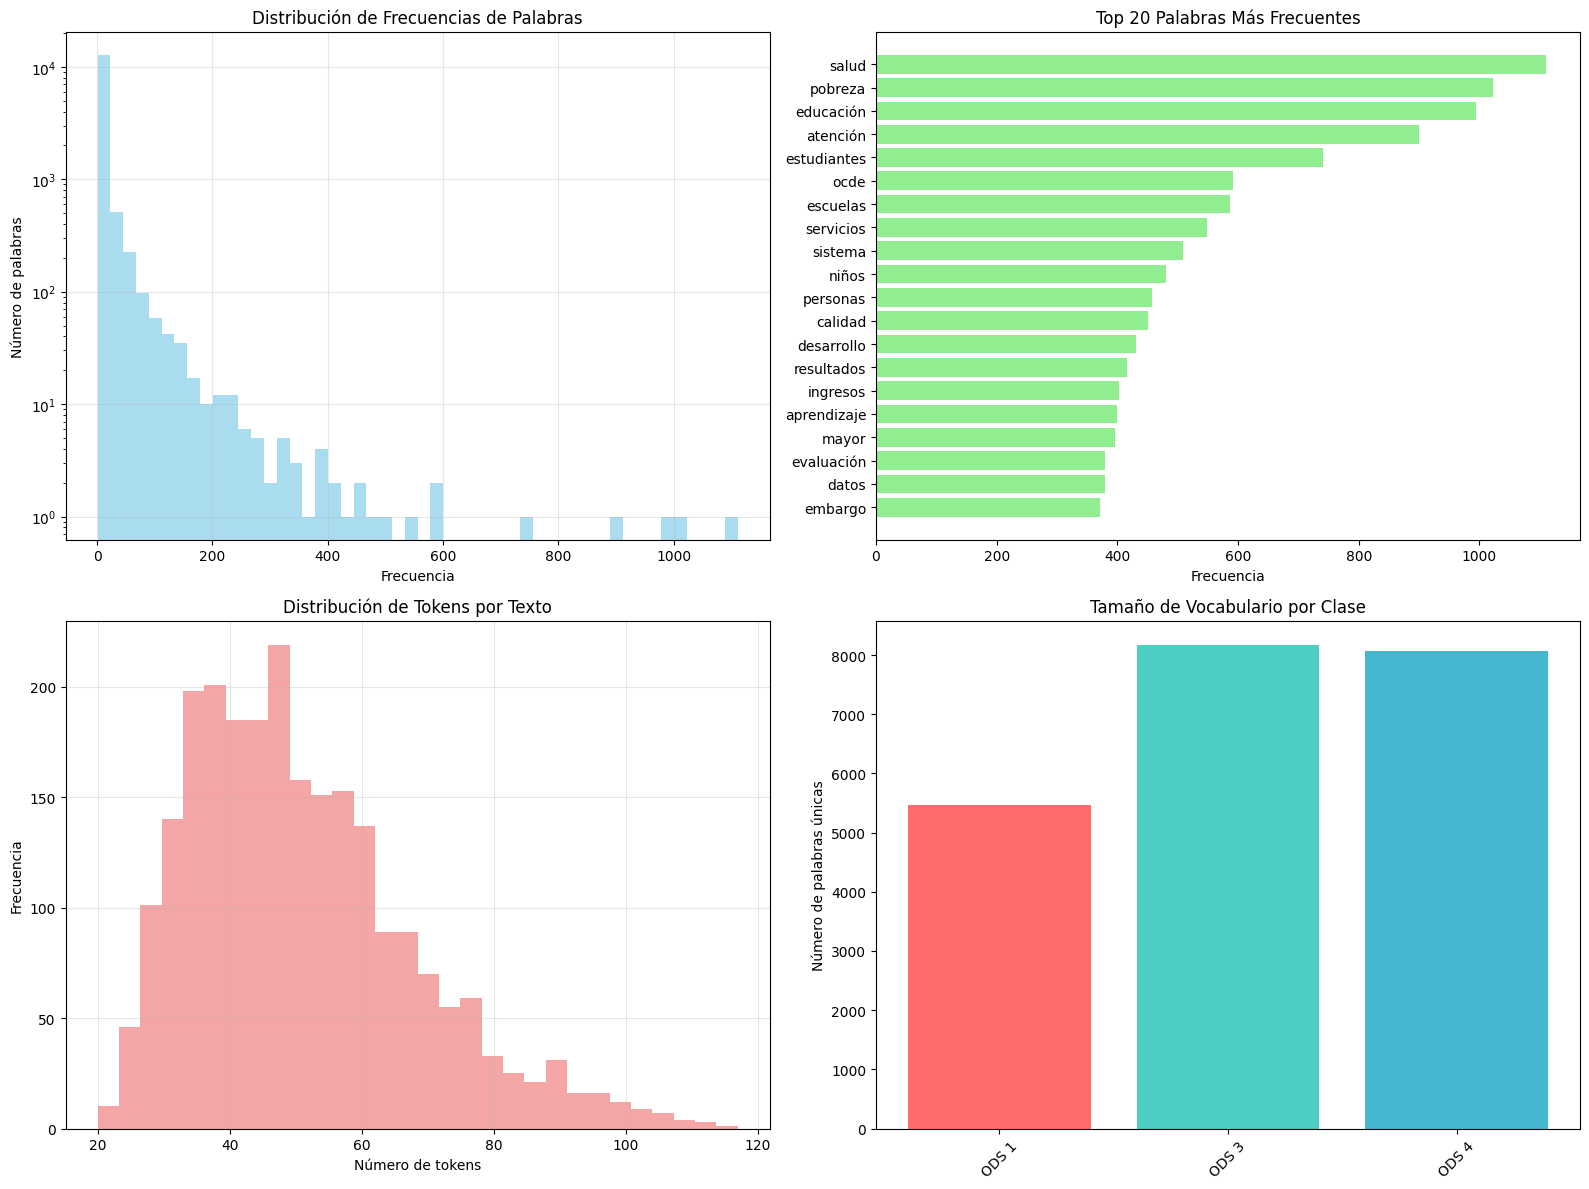


=== PALABRAS DISCRIMINATIVAS POR CLASE ===

ODS 1 - Fin de la pobreza:
  Palabras más discriminativas:
    privación: ratio=357.27, freq=94
    pobreza: ratio=238.97, freq=1006
    extrema: ratio=123.52, freq=65
    monetaria: ratio=81.72, freq=43
    transferencias: ratio=76.01, freq=60
    privaciones: ratio=53.21, freq=42
    pobre: ratio=41.05, freq=54
    pobres: ratio=39.38, freq=259
    relativa: ratio=37.37, freq=59
    umbral: ratio=35.47, freq=56

ODS 3 - Salud y bienestar:
  Palabras más discriminativas:
    enfermedades: ratio=357.85, freq=211
    mental: ratio=148.11, freq=262
    prevención: ratio=115.33, freq=68
    esperanza: ratio=110.24, freq=65
    hospitales: ratio=100.06, freq=118
    muertes: ratio=100.06, freq=59
    mentales: ratio=98.37, freq=58
    médicos: ratio=75.30, freq=222
    medicamentos: ratio=67.84, freq=80
    mortalidad: ratio=64.45, freq=152

ODS 4 - Educación de calidad:
  Palabras más discriminativas:
    profesores: ratio=284.95, freq=207
    

In [16]:
# Análisis del vocabulario
print("=== ANÁLISIS DE VOCABULARIO ===")

# Crear vocabulario completo del dataset de entrenamiento
todos_tokens = []
for tokens in datos_entrenamiento['tokens']:
    todos_tokens.extend(tokens)

# Contar frecuencias
contador_palabras = Counter(todos_tokens)
vocabulario_total = len(contador_palabras)

print(f"Vocabulario total: {vocabulario_total} palabras únicas")
print(f"Total de tokens: {len(todos_tokens)}")
print(f"Promedio de frecuencia por palabra: {len(todos_tokens)/vocabulario_total:.2f}")

# Palabras más frecuentes
print("\n=== PALABRAS MÁS FRECUENTES ===")
palabras_frecuentes = contador_palabras.most_common(20)
for palabra, freq in palabras_frecuentes:
    print(f"{palabra}: {freq}")

# Palabras menos frecuentes (que aparecen solo una vez)
palabras_unicas = [palabra for palabra, freq in contador_palabras.items() if freq == 1]
print(f"\nPalabras que aparecen solo una vez: {len(palabras_unicas)} ({len(palabras_unicas)/vocabulario_total*100:.1f}%)")

# Análisis por clase ODS
print("\n=== VOCABULARIO POR CLASE ODS ===")
vocabularios_por_clase = {}
for label in sorted(datos_entrenamiento['labels'].unique()):
    subset = datos_entrenamiento[datos_entrenamiento['labels'] == label]
    tokens_clase = []
    for tokens in subset['tokens']:
        tokens_clase.extend(tokens)
    
    contador_clase = Counter(tokens_clase)
    vocabularios_por_clase[label] = contador_clase
    
    print(f"\n{mapeo_ods[label]}:")
    print(f"  Vocabulario único: {len(contador_clase)} palabras")
    print(f"  Total tokens: {len(tokens_clase)}")
    print(f"  Palabras más frecuentes: {contador_clase.most_common(5)}")

# Visualización de frecuencias
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Distribución de frecuencias de palabras
frecuencias = list(contador_palabras.values())
axes[0,0].hist(frecuencias, bins=50, alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribución de Frecuencias de Palabras')
axes[0,0].set_xlabel('Frecuencia')
axes[0,0].set_ylabel('Número de palabras')
axes[0,0].set_yscale('log')
axes[0,0].grid(True, alpha=0.3)

# Top 20 palabras más frecuentes
palabras_top = [palabra for palabra, _ in palabras_frecuentes]
frecuencias_top = [freq for _, freq in palabras_frecuentes]
axes[0,1].barh(palabras_top[::-1], frecuencias_top[::-1], color='lightgreen')
axes[0,1].set_title('Top 20 Palabras Más Frecuentes')
axes[0,1].set_xlabel('Frecuencia')

# Distribución de longitud de vocabulario por texto
axes[1,0].hist(datos_entrenamiento['num_tokens'], bins=30, alpha=0.7, color='lightcoral')
axes[1,0].set_title('Distribución de Tokens por Texto')
axes[1,0].set_xlabel('Número de tokens')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].grid(True, alpha=0.3)

# Comparación de vocabulario por clase
clases = list(vocabularios_por_clase.keys())
tamaños_vocab = [len(vocabularios_por_clase[clase]) for clase in clases]
nombres_clases = [f"ODS {clase}" for clase in clases]
axes[1,1].bar(nombres_clases, tamaños_vocab, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1,1].set_title('Tamaño de Vocabulario por Clase')
axes[1,1].set_ylabel('Número de palabras únicas')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Análisis de palabras discriminativas por clase
print("\n=== PALABRAS DISCRIMINATIVAS POR CLASE ===")
for label in sorted(datos_entrenamiento['labels'].unique()):
    print(f"\n{mapeo_ods[label]}:")
    
    # Palabras más frecuentes en esta clase
    contador_clase = vocabularios_por_clase[label]
    
    # Calcular TF-IDF simple (frecuencia relativa)
    total_tokens_clase = sum(contador_clase.values())
    palabras_importantes = []
    
    for palabra, freq in contador_clase.most_common(100):  # Top 100 de la clase
        # Frecuencia relativa en esta clase
        freq_relativa = freq / total_tokens_clase
        
        # Frecuencia en otras clases
        freq_otras_clases = 0
        total_otras_clases = 0
        for other_label in vocabularios_por_clase:
            if other_label != label:
                freq_otras_clases += vocabularios_por_clase[other_label].get(palabra, 0)
                total_otras_clases += sum(vocabularios_por_clase[other_label].values())
        
        if total_otras_clases > 0:
            freq_relativa_otras = freq_otras_clases / total_otras_clases
            # Ratio de discriminación
            if freq_relativa_otras > 0:
                ratio_discriminacion = freq_relativa / freq_relativa_otras
                palabras_importantes.append((palabra, ratio_discriminacion, freq))
    
    # Ordenar por ratio de discriminación
    palabras_importantes.sort(key=lambda x: x[1], reverse=True)
    
    print("  Palabras más discriminativas:")
    for palabra, ratio, freq in palabras_importantes[:10]:
        print(f"    {palabra}: ratio={ratio:.2f}, freq={freq}")